# Programming Assignment # 4 Clustering

## Student Details

When submitting, fill your full name, your student ID and your NetID in this cell. Note that this is a markdown cell! 

Student Full Name: Kiran Venkatesh Kulkarni

ID: 1001848434

Team Mate name : Vijetha Shenoy Badiadka

ID: 1001822855

## Rules

1. Work is to be done in a team
2. Any cheating including plagiarism, cooperation will be reported to the corresponding UTA’ s instance.
3. If using any resource (books, internet), please make sure that you cite it.
4. Follow the given structure. Specifically, place all your tasks in THIS NOTEBOOK BUT IN SEPARATE BLOCKS. Then save this notebook as 'yourNetID_pa3.ipynb' and submit it. 
5. Do not alter the dataset name.
6. Please dont ask any details specific to the project like "How to plot XYZ ? What parameters are to be used? " and so on..
7. Report is required for this assignment. Still you need to comment your code. (-10 for no comments in the code.)
8. Please dont send images of your visualizations to verify whether they are right or not before submission deadline.



## Assignment Details

The purpose of this assignment is to cluster  using K-means clustering and Hierarchical Agglomerative clustering models and to visualize clusters for predicted and actual cluster labels.


Your dataset is given as 3 files . 




You need to submit this .ipynb file after renaming it. 

Preprocessing will be needed for the data as most of the data is in string and needs to be quantified.



In [24]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import accuracy_score 

## Required Python Packages 

# Import required Python packages here
# Seaborn,numpy,pandas,sklearn,matplotlib only
-20 points for the use of libraries other than the above mentioned

## TASK 1: K-Means Clustering

### Task 1-a: Determine “k” value from the elbow method

In this task, you will be using the elbow method to determine the optimal number of clusters for k-means clustering.

We need some way to determine whether we are using the right number of clusters when using k-means clustering. One method to validate the number of clusters is the elbow method. 

The idea of the elbow method is to run k-means clustering on the dataset for a range of values of k (k will be from 1 to 10 in this task), and for each value of k calculate the sum of squared errors (SSE). Then, plot a line chart of the SSE for each value of k. If the line chart looks like an arm, then the "elbow" on the arm is the value of k that is the best. The idea is that we want a small SSE, but that the SSE tends to decrease toward 0 as we increase k (the SSE is 0 when k is equal to the number of data points in the dataset, because then each data point is a cluster, and there is no error between it and the center of its cluster). So our goal is to choose a small value of k that still has a low SSE, and the elbow usually represents where we start to have diminishing returns by increasing k.

For this task, you need to perform the elbow method for k from 1 to 10 and plot a line chart of the SSE for each value of k, and determine the best k (the number of clusters). Note that you need to use the whole dataset in this task and you need to print your decision for k.

In [26]:
data_frame = pd.read_csv('College.csv')
null_vals = data_frame.isnull().sum()
print(null_vals)

Unnamed: 0     0
Private        0
Apps           0
Accept         0
Enroll         0
Top10perc      0
Top25perc      0
F.Undergrad    0
P.Undergrad    0
Outstate       0
Room.Board     0
Books          0
Personal       0
PhD            0
Terminal       0
S.F.Ratio      0
perc.alumni    0
Expend         0
Grad.Rate      0
dtype: int64


In [27]:
data_frame.head()

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [28]:
data_frame = data_frame.iloc[:,1:]#dropping the Names column from the dataframe
data_frame.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [29]:
data_frame['Private'] = data_frame['Private'].map({'Yes':1 ,'No':0})

In [30]:
data_frame.drop(['Apps','Enroll','F.Undergrad'],inplace=True,axis=1) #highly corelated

In [31]:
data_frame.head() #After preprocessing

,Private,Accept,Top10perc,Top25perc,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,1,1232,23,52,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,1,1924,16,29,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,1,1097,22,50,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,1,349,60,89,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,1,146,16,44,869,7560,4120,800,1500,76,72,11.9,2,10922,15


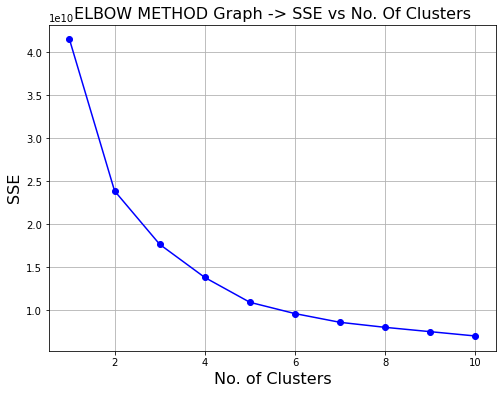

The optimal k value is k = 3


In [32]:
def SSELinePlot(data_frame_updated, cols, n_clusters=10, max_iter=300, tol=1e-04, init='k-means++', 
                n_init=10, algorithm='auto'):
#n_clusters represents the number of clusters
#max_iter represents max iterations for each loop
#tole is used to check if the error is greater than the toleerance value
#init represents method for initialization 
#n_init represents how many time the kmeans can be run independently
    s_vals = [] 
    for i in range(1, n_clusters+1):
        kmeans = KMeans(n_clusters=i, max_iter=max_iter, tol=tol, init=init,
                    n_init=n_init, random_state=1, algorithm=algorithm)
        kmeans.fit_predict(data_frame_updated.iloc[:, cols])
        s_vals.append(kmeans.inertia_)
    fig, ax = plt.subplots(figsize=(8, 6))
    plt.plot(range(1, n_clusters+1), s_vals, color='blue', marker='o')
    plt.xlabel('No. of Clusters', fontsize=16)
    plt.ylabel('SSE', fontsize=16)
    plt.title('ELBOW METHOD Graph -> SSE vs No. Of Clusters', fontsize=16)
    plt.grid()
    plt.show()
    
data_frame_updated = data_frame.iloc[:,1:]
SSELinePlot(data_frame_updated,[0,1,2,3,4,5,6,7,8,9,10,11,12])

print("The optimal k value is k = 3")

### Task 1-b: Visualization for K-Means Clustering

In this task, you will be performing k-means clustering for k=2 and visualize the predicted training samples and actual training samples on scatter plots. Use 70% of the dataset for training and 30% of the dataset for testing. Perform kmeans for clustering samples in your training set. 

Use two subplots for visualizing the predicted training samples and actual training samples on two scatter plots.

Since your dataset has multiple features(dimensions), you won't be able to plot your data on a scatter plot. Thus, you’re going to visualize your data with the help of one of the Dimensionality Reduction techniques, namely Principal Component Analysis (PCA). The idea in PCA is to find a linear combination of the two variables that contains most of the information. This new variable or “principal component” can replace the two original variables. You can easily apply PCA to your data with the help of scikit-learn.



In [33]:
###################begin code for Task 1-b-1: Split the dataset 70% for training and 30% for testing
# random state = 2022
### Important!!!
X_training = data_frame.sample(frac=0.7, random_state=2022)
X_test = data_frame.drop(X_training.index)
y_train = X_training.pop('Private')
y_test = X_test.pop('Private')

###################end code for Task 1-b-1

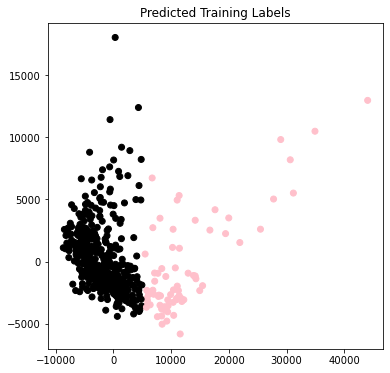

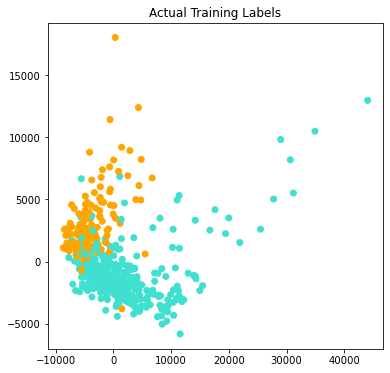

In [34]:
###################begin code for Task 1-b-2: Visualize the predicted training labels vs actual training labels

# Import PCA
from sklearn.decomposition import PCA

# Create the KMeans model
model = KMeans(n_clusters = 2, random_state=0).fit(X_training)

# Compute cluster centers and predict cluster index for each sample 
cluster_index = model.predict(X_training)

# Model and fit the data to the PCA model
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_training)


# Visualize the predicted training labels vs actual training labels. 
### scatter(x, y, your_data)
x = X_train_pca[:, 0]
y = X_train_pca[:, 1]

colorpalette = ['black','blue','green','pink'] 
colorpalette1 = ['orange', 'black','pink', 'turquoise']

# Plotting for Predicted Training labels
plt.figure(figsize=(6,6))
plt.title("Predicted Training Labels")
plt.scatter(x,y, c=cluster_index, cmap=matplotlib.colors.ListedColormap(colorpalette))
plt.show()

# Plotting for Actual Training labels
plt.figure(figsize=(6,6))
plt.title("Actual Training Labels")
plt.scatter(x,y, c=y_train, cmap=matplotlib.colors.ListedColormap(colorpalette1))
plt.show()
###################end code for Task 1-b-2


Now, you need to visualize the predicted testing labels versus actual testing labels. Use the trained model in previous step.

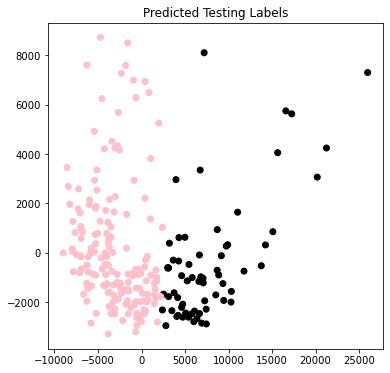

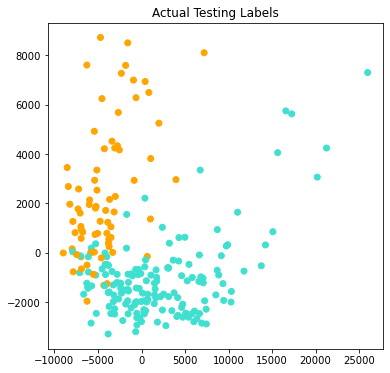

In [35]:
###################begin code for Task 1-b-3: Visualize the predicted testing labels vs actual testing labels

model = KMeans(n_clusters = 2, random_state=0).fit(X_test)

# predict cluster index for each sample 
clus_test = model.predict(X_test)

# Model and fit the data to the PCA model
pca = PCA(n_components=2)
X_test_pca = pca.fit_transform(X_test)

# Visualize the predicted testing labels vs actual testing labels. 
### scatter(x, y, your_data)
x = X_test_pca[:, 0]
y = X_test_pca[:, 1]


#using different colors for visualization
colorpalette = ['black','blue','green','pink'] 
colorpalette1 = ['orange', 'black','pink', 'turquoise']

# Plotting for Predicted Testing labels
plt.figure(figsize=(6,6))
plt.title("Predicted Testing Labels")
plt.scatter(x,y, c=clus_test, cmap=matplotlib.colors.ListedColormap(colorpalette))
plt.show()

# Plotting for Actual Testing labels
plt.figure(figsize=(6,6))
plt.title("Actual Testing Labels")
plt.scatter(x,y, c=y_test, cmap=matplotlib.colors.ListedColormap(colorpalette1))
plt.show()

###################end code for Task 1-b-3

In this step, you need to provide the evaluation of your clustering model. Print out a confusion matrix.

Confusion Matrix for Training Data & Test Data



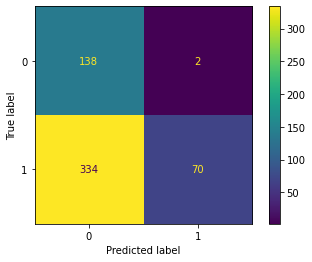

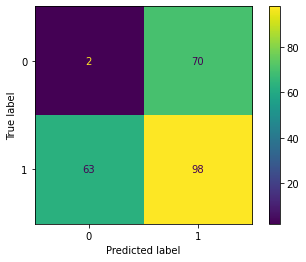

In [36]:
###################begin code for Task 1-b-4: Print out a confusion matrix
#Confusion Matrix for Training Data
print("Confusion Matrix for Training Data & Test Data\n")
cn_matrix = confusion_matrix(y_train, cluster_index)
display = ConfusionMatrixDisplay(confusion_matrix=cn_matrix)
display.plot() 
#plt.set_cmap('Blues')
#Confusion Matrix for Testing Data
cn_matrix1 = confusion_matrix(y_test, clus_test)
display1 = ConfusionMatrixDisplay(confusion_matrix=cn_matrix1)
display1.plot() 

###################end code for Task 1-b-4

# TASK 2: Hierarchical Agglomerative  Clustering

## Task 2-a: Find the best Hierarchical Agglomerative Clustering Model

In this task, you will be performing Hierarchical Agglomerative clustering with different linkage methods (complete and average) and different similarity measures (cosine, euclidean, and manhattan) in order to find the best pair of linkage method and similarity measure. Use F1 score for evaluation and take n_clusters = 2.


In [37]:
###################begin code for Task 2-a: Print out a confusion matrix
# Import AgglomerativeClustering
from sklearn.cluster import AgglomerativeClustering
# Import pairwise_distances for calculating pairwise distance matrix
from sklearn.metrics.pairwise import pairwise_distances
# Import f1_score
from sklearn.metrics import f1_score

## Calculate pairwise distance matrix for X_train
pd_train = X_training

## Model and fit the training data to the AgglomerativeClustering model
## complete linkage + cosine
cos_dist = pairwise_distances(pd_train, metric='cosine')
cosine = AgglomerativeClustering(n_clusters=2, affinity='precomputed', linkage='complete')
predict_cos = cosine.fit_predict(cos_dist)
f1_cosine = f1_score(y_train, predict_cos, labels=None, pos_label=1, average='weighted', sample_weight=None)

## Model and fit the training data to the AgglomerativeClustering model
## complete linkage + euclidean
euclidean_distance = pairwise_distances(pd_train, metric='euclidean')
euclidean = AgglomerativeClustering(n_clusters=2, affinity='precomputed', linkage='complete')
predict_euc = euclidean.fit_predict(euclidean_distance)
f1_euclidean = f1_score(y_train, predict_euc, labels=None, pos_label=1, average='weighted', sample_weight=None)

## Model and fit the training data to the AgglomerativeClustering model
## complete linkage + manhattan
man_dist = pairwise_distances(pd_train, metric='manhattan')
manhattan = AgglomerativeClustering(n_clusters=2, affinity='precomputed', linkage='complete')
pred_man = manhattan.fit_predict(man_dist)
f1_manhattan = f1_score(y_train, pred_man, labels=None, pos_label=1, average='weighted', sample_weight=None)

## Model and fit the training data to the AgglomerativeClustering model
## average linkage + cosine
cosine_avg = AgglomerativeClustering(n_clusters=2, affinity='precomputed', linkage='average')
predict_cos_avg = cosine_avg.fit_predict(cos_dist)
f1_cosine_avg = f1_score(y_train, predict_cos_avg, labels=None, pos_label=1, average='weighted', sample_weight=None)

## Model and fit the training data to the AgglomerativeClustering model
## average linkage + euclidean
euclidean_avg = AgglomerativeClustering(n_clusters=2, affinity='precomputed', linkage='average')
predict_euc_avg = euclidean_avg.fit_predict(euclidean_distance)
f1_euclidean_avg = f1_score(y_train, predict_euc_avg, labels=None, pos_label=1, average='weighted', sample_weight=None)


## Model and fit the training data to the AgglomerativeClustering model
## average linkage + manhattan
manhattan_avg = AgglomerativeClustering(n_clusters=2, affinity='precomputed', linkage='average')
pred_man_avg = manhattan_avg.fit_predict(man_dist)
f1_manhattan_avg = f1_score(y_train, pred_man_avg, labels=None, pos_label=1, average='weighted', sample_weight=None)

print("F1-score for complete linkage + cosine", f1_cosine)
print("F1-score for complete linkage + euclidean", f1_euclidean)
print("F1-score for complete linkage + manhattan", f1_manhattan)
print("F1-score for average linkage + cosine", f1_cosine_avg)
print("F1-score for average linkage + euclidean", f1_euclidean_avg)
print("F1-score for average linkage + manhattan", f1_manhattan_avg)
###################end code for Task 2-a

F1-score for complete linkage + cosine 0.09927561529062665
F1-score for complete linkage + euclidean 0.6220462543991955
F1-score for complete linkage + manhattan 0.13543655527357146
F1-score for average linkage + cosine 0.10174718119779622
F1-score for average linkage + euclidean 0.13173541958805537
F1-score for average linkage + manhattan 0.15007541478129713


## Task 2-b:  Visualization for Hierarchical Agglomerative Clustering

Find the best performed model from the previous step and use that model for visualizing the predicted training samples and actual training samples on scatter plots. Use PCA model for visualizing your data (use X_train_pca from Task 1-b-2). 

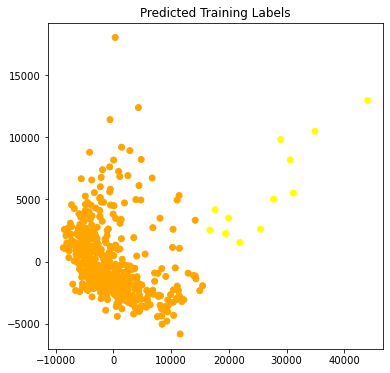

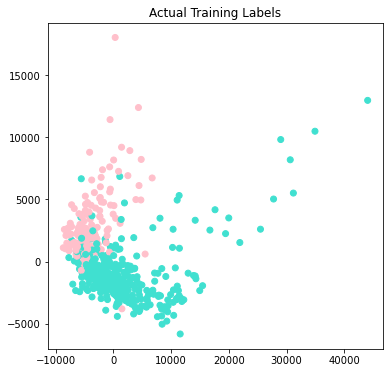

In [38]:
###################begin code for Task 2-b: Visualize the predicted training labels vs actual training labels


models = {'predict_cos':f1_cosine,
          'predict_euc':f1_euclidean,
          'pred_man':f1_manhattan,
          'predict_cos_avg':f1_cosine_avg,
          'predict_euc_avg':f1_euclidean_avg,
          'pred_man_avg':f1_manhattan_avg}
best_model_name = max(models,key=models.get)

if best_model_name == 'predict_cos':
    best_model = predict_cos

elif best_model_name == 'predict_euc':
    best_model = predict_euc

elif best_model_name == "pred_man":
    best_model = pred_man

elif best_model_name == 'cos_avg':
    best_model = cos_avg

elif best_model_name == 'euc_avg':
    best_model = euc_avg

elif best_model_name == 'man_avg':
    best_model = man_avg

else:
    best_model = None

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_training)

# Visualize the predicted training labels versus actual training labels. 
x = X_train_pca[:, 0]
y = X_train_pca[:, 1]

colorpalette = ['yellow','orange'] 
colorpalette1 = ['pink', 'turquoise']

# Plotting for Predicted Training labels
plt.figure(figsize=(6,6))
plt.title("Predicted Training Labels")
plt.scatter(x,y, c=best_model, cmap=matplotlib.colors.ListedColormap(colorpalette))
plt.show()

# Plotting for Actual Training labels
plt.figure(figsize=(6,6))
plt.title("Actual Training Labels")
plt.scatter(x,y, c=y_train, cmap=matplotlib.colors.ListedColormap(colorpalette1))
plt.show()


###################end code for Task 2-b

# TASK 3:  Compare K-Means Clustering and Hierarchical Agglomerative Clustering

## Task 3-a: Visualize Clusters 

In this task, use whole dataset for training k-means cluster and hierarchical agglomerative clustering. Use the best model for agglomerative clustering. Visualize the predicted labels from k-means clustering and agglomerative clustering versus actual labels. Basically, you need to plot three scatter plots as subplots. 

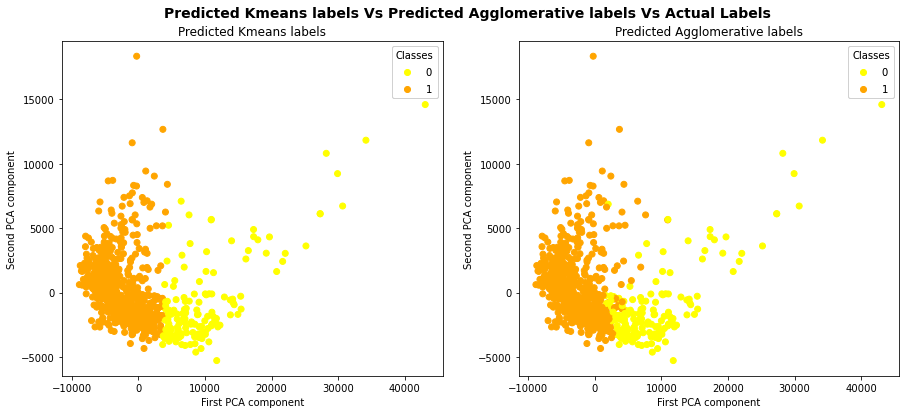

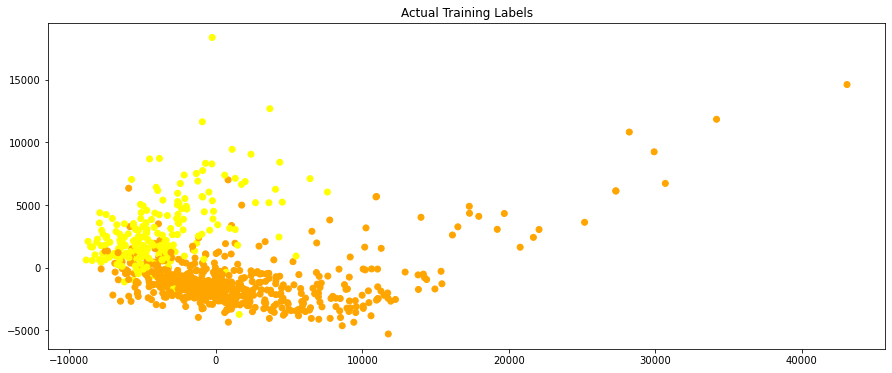

In [39]:
###################begin code for Task 3-a: Visualize the predicted training labels vs actual training labels

X = data_frame[data_frame.columns[0:]]
Y = data_frame[data_frame.columns[0]]

### Kmeans Clustering
# Model and fit the data to the Kmeans (use fit_predict : Performs clustering on X and returns cluster labels.)
model = KMeans(n_clusters = 2, random_state=0).fit(X)
cluster_index_kmeans = model.fit_predict(X)

### Agglomerative Clustering
# Calculate pairwise distance matrix for X
cos_dist = pairwise_distances(X, metric='cosine')
euclidean_distance = pairwise_distances(X, metric='euclidean')
man_dist = pairwise_distances(X, metric='manhattan')

# Model and fit the data to the Agglomerative (use fit_predict : Performs clustering on X and returns cluster labels.)
agg = AgglomerativeClustering(n_clusters=2, affinity='precomputed', linkage='complete')
pred_cos = agg.fit_predict(cos_dist)
predict_euc = agg.fit_predict(euclidean_distance)
pred_man = agg.fit_predict(man_dist)
f1_cosine = f1_score(Y, pred_cos, labels=None, pos_label=1, average='weighted', sample_weight=None)
f1_euclidean = f1_score(Y, predict_euc, labels=None, pos_label=1, average='weighted', sample_weight=None)
f1_manhattan = f1_score(Y, pred_man, labels=None, pos_label=1, average='weighted', sample_weight=None)
models = {'pred_cos':f1_cosine,'predict_euc':f1_euclidean,'pred_man':f1_manhattan}
best_model_name = max(models,key=models.get)

if best_model_name == 'pred_cos':
    best_model = pred_cos

elif best_model_name == 'predict_euc':
    best_model = predict_euc

elif best_model_name == "pred_man":
    best_model = pred_man
    
else:
    best_model = None

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_training)

### Visualize Clusters
#  Model and fit the data to the PCA model
X_pca = PCA(n_components=2).fit_transform(X)
x = X_pca[:, 0]
y = X_pca[:, 1]

# Visualize the predicted Kmeans labels versus  the predicted Agglomerative labels versus Actual labels. 
fig1, ax = plt.subplots(1, 2,figsize=(15, 6))
fig, axs = plt.subplots(figsize=(15, 6))

# Adjust layout
fig1.suptitle('Predicted Kmeans labels Vs Predicted Agglomerative labels Vs Actual Labels', fontsize=14, fontweight='bold')
fig1.subplots_adjust(top=0.9)

# Add scatterplots to the subplots 
x = X_pca[:, 0]
y = X_pca[:, 1]
s=ax[0].scatter(x,y, c=cluster_index_kmeans, cmap=matplotlib.colors.ListedColormap(colorpalette))
ax[0].set_title('Predicted Kmeans labels')
ax[1].scatter(x,y, c=best_model, cmap=matplotlib.colors.ListedColormap(colorpalette))
ax[1].set_title('Predicted Agglomerative labels')
s=axs.scatter(x,y, c=Y, cmap=matplotlib.colors.ListedColormap(colorpalette))
axs.set_title('Actual Training Labels')

for a in ax.flat:
    a.set(xlabel='First PCA component', ylabel='Second PCA component')
    legend1 = a.legend(*s.legend_elements(),
                    loc="upper right", title="Classes")
    a.add_artist(legend1)
plt.show()

###################end code for Task 3-a

## Task 3-b: Compare K-Means Clustering &  Hierarchical Agglomerative Clustering

Print out confusion matrices for kmeans and agglomerative clustering. Also, compare precision, recall, and F1-score for both model. Type your reasoning.

Kmeans:
 Accuracy is: 44.53024453024453 

Confusion Matrixxx: 

Classification Report: 
               precision    recall  f1-score   support

           0       0.33      0.98      0.49       212
           1       0.97      0.25      0.39       565

    accuracy                           0.45       777
   macro avg       0.65      0.61      0.44       777
weighted avg       0.79      0.45      0.42       777

Agglomerative clustering: 
Accuracy is: 54.054054054054056 

Confusion Matrix: 

Classification Report: 
               precision    recall  f1-score   support

           0       0.01      0.00      0.01       212
           1       0.67      0.74      0.70       565

    accuracy                           0.54       777
   macro avg       0.34      0.37      0.35       777
weighted avg       0.49      0.54      0.51       777



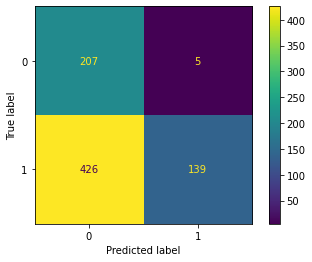

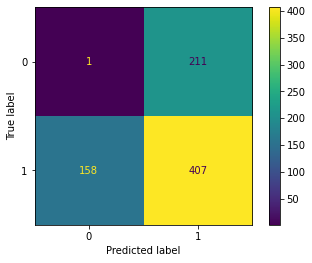

In [40]:
###################begin code for Task 3-b
clus_kmeans_kmeans = model.fit_predict(X)
dp_kmeans = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(Y, clus_kmeans_kmeans))
print("Kmeans:\n Accuracy is:", accuracy_score(Y,clus_kmeans_kmeans)*100,"\n")
print("Confusion Matrixxx: \n",dp_kmeans.plot(),'\n')
print("Classification Report: \n",classification_report(Y,clus_kmeans_kmeans))

agg_clustering = (AgglomerativeClustering(n_clusters=2)).fit_predict(X)
disp_agg = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(Y, best_model))
print("Agglomerative clustering: \nAccuracy is:", accuracy_score(Y,agg_clustering)*100,"\n")
print("Confusion Matrix: \n",disp_agg.plot(),'\n')
print("Classification Report: \n",classification_report(Y,agg_clustering))



###################end code for Task 3-b

## Grading 

<b>[05 points] Follow the Rules</b> 


<b>[35 points] Task 1:</b>  

    [10 points] Task 1-a: Determine “k” value from the elbow method

    [25 points] Task 1-b: Visualization for K-Means Clustering

        [02 points] Task 1-b-1: Split the dataset 
    
        [10 points] Task 1-b-2: Visualize the predicted training vs actual training labels 
    
        [10 points] Task 1-b-3: Visualize the predicted testing vs actual testing labels
    
        [03 points] Task 1-b-4: Print out a confusion matrix
    


<b>[45 points] Task 2:</b>  

    [35 points] Task 2-a: Find the best Hierarchical Agglomerative Clustering Model

    [10 points] Task 2-b: Visualization for Hierarchical Agglomerative Clustering



<b>[15 points] Report :</b> 
Make a 1 min video explaining the assignment and it's implementation.
    


 <b>[20 points] Task 3 (BONUS):</b> 

    Task 3-a: 10 points

    Task 3-b: 10 points